# Задача 2: аппроксимация функции

## Импортирую библиотеки для решения задачи

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

## Генерирую значения x. Далее создаём 4 функции: 1 - исходная, 2 - многочлен первой степени, 2 - многочлен второй степени, 3 - многочлен третьей степени

In [26]:
x = np.arange(0,15.01, 0.01) 

In [27]:
def f(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)

def g(w0, w1, x):
    return w0 + w1 * x

def h(w00, w11, w22, x):
    return w00 + w11 * x + w22 * x**2

def K(w000, w111, w222, w333, x):
    return w000 + w111 * x + w222 * x**2 + w333 * x**3

## Будет полезно знать номера индексов x, соответствующие значениям 1,4,8,10,15. Потому что в дальнейшем обращение по индексу будет использоваться в матрицах

In [28]:
x1_num = np.where(x == 1.)[0]
x4_num = np.where(x == 4.)[0]
x8_num = np.where(x == 8.)[0]
x10_num = np.where(x == 10.)[0]
x15_num = np.where(x == 15.)[0]

print ('\n Индекс из range для x = 1:\n', x1_num)
print ('\n Индекс из range для x = 4:\n', x4_num)
print ('\n Индекс из range для x = 8:\n', x8_num)
print ('\n Индекс из range для x = 10:\n', x10_num)
print ('\n Индекс из range для x = 15:\n', x15_num)


 Индекс из range для x = 1:
 [100]

 Индекс из range для x = 4:
 [400]

 Индекс из range для x = 8:
 [800]

 Индекс из range для x = 10:
 [1000]

 Индекс из range для x = 15:
 [1500]


## Производим вычисления весов для многочлена первой степени. Создаём матрицу коэффициентов перед весами и вектор столбец значений функций в точках x = 1, x = 15

In [30]:
A_1 = np.array([[1,x[100]],[1,x[1500]]])
b_1 = np.array([[f(1.)],[f(15.)]])
w0, w1 = linalg.solve(A_1,b_1)

print ('\n Матрица коэффициентов A_1 перед весами w:\n',A_1)
print ('\n Вектор-столбец b_1 со значениями функции в точках x=1 и x=15:\n',b_1)
print ('\n Вычисленные значения весов w0, w1:\n', w0,w1)
print ('\n Проверка решения (умножение матрицы коэффициентов перед весами на сами веса):\n', np.dot(A_1, [w0, w1]))


 Матрица коэффициентов A_1 перед весами w:
 [[ 1.  1.]
 [ 1. 15.]]

 Вектор-столбец b_1 со значениями функции в точках x=1 и x=15:
 [[3.25221687]
 [0.63522142]]

 Вычисленные значения весов w0, w1:
 [3.43914511] [-0.18692825]

 Проверка решения (умножение матрицы коэффициентов перед весами на сами веса):
 [[3.25221687]
 [0.63522142]]


## Теперь производим вычисление весов для многочлена второй степени, действуя аналогично как и в предыдущем пункте.

In [31]:
A_2 = np.array([[1,x[100],x[100]],[1,x[800],x[800]**2],[1,x[1500],x[1500]**2]])
b_2 = np.array([[f(1.)],[f(8.)],[f(15)]])
w00, w11, w22 = linalg.solve(A_2, b_2)

print ('\n Матрица коэффициентов A_2 перед весами w:\n',A_2)
print ('\n Вектор-столбец b_2 со значениями функции в точках x=1, x=8, x=15:\n',b_2)
print ('\n Вычисленные значения весов w00, w11, w22:\n', w00,w11,w22)
print ('\n Проверка решения (умножение матрицы коэффициентов перед весами на сами веса):\n', np.dot(A_2, [w00, w11, w22]))


 Матрица коэффициентов A_2 перед весами w:
 [[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]]

 Вектор-столбец b_2 со значениями функции в точках x=1, x=8, x=15:
 [[3.25221687]
 [2.31617016]
 [0.63522142]]

 Вычисленные значения весов w00, w11, w22:
 [3.32512949] [-0.06531159] [-0.00760104]

 Проверка решения (умножение матрицы коэффициентов перед весами на сами веса):
 [[3.25221687]
 [2.31617016]
 [0.63522142]]


## Далее рассмотрим многочлен третьей степени и для него вычисяем веса. Проводится аналогичным образом, как и в предыдущих пунктах.

In [32]:
A_3 = np.array([[1,x[100],x[100]**2,x[100]**3],[1,x[400],x[400]**2,x[400]**3],
                [1,x[1000],x[1000]**2,x[1000]**3],[1,x[1500],x[1500]**2,x[1500]**3]])
b_3 = np.array([[f(1.)],[f(4.)],[f(10.)],[f(15.)]])

w000,w111,w222,w333 = linalg.solve(A_3, b_3)

print ('\n Матрица коэффициентов A_3 перед весами w:\n',A_3)
print ('\n Вектор-столбец b_3 со значениями функции в точках x=1, x=4, x=10, x=15:\n',b_3)
print ('\n Вычисленные значения весов w000, w111, w222, w333:\n', w000,w111,w222,w333)
print ('\n Проверка решения (умножение матрицы коэффициентов перед весами на сами веса):\n',
       np.dot(A_3, [w000, w111, w222, w333]))


 Матрица коэффициентов A_3 перед весами w:
 [[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]

 Вектор-столбец b_3 со значениями функции в точках x=1, x=4, x=10, x=15:
 [[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]

 Вычисленные значения весов w000, w111, w222, w333:
 [4.36264154] [-1.29552587] [0.19333685] [-0.00823565]

 Проверка решения (умножение матрицы коэффициентов перед весами на сами веса):
 [[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]


## Теперь давайте визуализируем наши функции с полученными весами и оценим, какая функция лучше приближает исходную

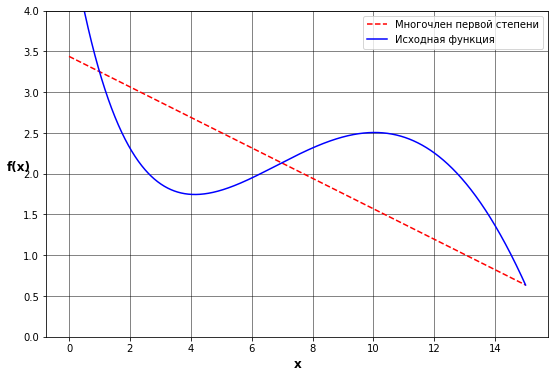

In [33]:
plt.figure(figsize = (9,6))
plt.plot(x, g(w0,w1,x), '--', color = 'red', label = 'Многочлен первой степени')
plt.plot(x, f(x), color = 'blue', label = 'Исходная функция')
plt.xlabel('x', fontsize = 12, fontweight = 'bold')
plt.ylabel('f(x)', fontsize = 12, rotation = 0, fontweight = 'bold')
plt.ylim(0,4)
plt.grid(True, alpha = 0.6, color = 'black')
plt.legend()
plt.show()

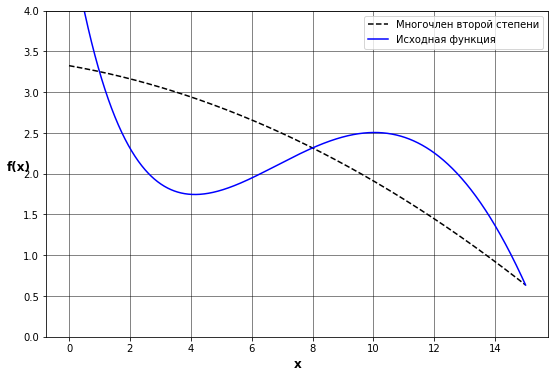

In [34]:
plt.figure(figsize = (9,6))
plt.plot(x, h(w00,w11,w22,x), '--', color = 'black', label = 'Многочлен второй степени')
plt.plot(x, f(x), color = 'blue', label = 'Исходная функция')
plt.xlabel('x', fontsize = 12, fontweight = 'bold')
plt.ylabel('f(x)', fontsize = 12, rotation = 0, fontweight = 'bold')
plt.ylim(0,4)
plt.grid(True, alpha = 0.6, color = 'black')
plt.legend()
plt.show()

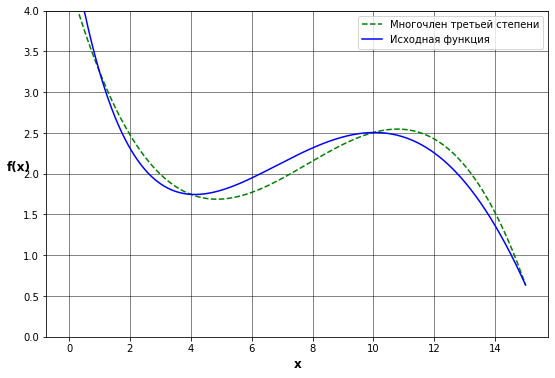

In [35]:
plt.figure(figsize = (9,6))
plt.plot(x, K(w000,w111,w222,w333,x),'--', color = 'green', label = 'Многочлен третьей степени')
plt.plot(x, f(x), color = 'blue', label = 'Исходная функция')
plt.xlabel('x', fontsize = 12, fontweight = 'bold')
plt.ylabel('f(x)', fontsize = 12, rotation = 0, fontweight = 'bold')
plt.ylim(0,4)
plt.grid(True, alpha = 0.6, color = 'black')
plt.legend()
plt.show()

## Анализируя графики, мы видим, что многочлен третьей степени всех лучше аппроксимирует исходную функцию.

## Теперь необходимо записать полученные веса в текстовый файл. Когда проводил решение системы, то ответы записывал не в виде одного списка с ответами, а как 4 отдельных списка. Поэтому обращусь к каждому весу по индексу, что позволит вытащить значения весов, и округлю до 3 знаков после запятой.

In [36]:
weight_0 = round(w000[0], 3)
weight_1 = round(w111[0], 3)
weight_2 = round(w222[0], 3)
weight_3 = round(w333[0], 3)

z = []                       # Создаю пустой список, куда  буду записывать значения весов

print ('\n Вес w_0:\n', weight_0)
print ('\n Вес w_1:\n', weight_1)
print ('\n Вес w_2:\n', weight_2)
print ('\n Вес w_3:\n', weight_3)


 Вес w_0:
 4.363

 Вес w_1:
 -1.296

 Вес w_2:
 0.193

 Вес w_3:
 -0.008


## Добавляю значения весов в созданный массив z

In [37]:
z.append(weight_0)
z.append(weight_1)
z.append(weight_2)
z.append(weight_3)

print ('\n Список z:\n', z)


 Список z:
 [4.363, -1.296, 0.193, -0.008]


## Записываю полученные значения весов в текстовый файл, как требуется в задании.

In [38]:
with open('D:\Coursera\Homework2.1.txt', 'w') as file:
    file.writelines(z + ' ' for z in map(str, z))
file.close()

## Снова открываю файл и убеждаюсь, что всё записано верно

In [39]:
file = open('D:\Coursera\Homework2.1.txt', 'r')
for line in file:
    print (line.strip())

4.363 -1.296 0.193 -0.008
